In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as scs
import joblib
import yaml
import matplotlib.pyplot as plt

## 1. Import Params

In [2]:
params_dir = "config/config.yaml"

In [3]:
def load_params(params_dir):
    with open(params_dir, 'r') as file:
        params = yaml.safe_load(file)
        
    return params

In [4]:
params = load_params(params_dir)

In [5]:
params

{'columns_to_keep': ['hdi', 'continent', 'EFConsPerCap'],
 'raw_dataset_dir': 'data/raw/',
 'train_set_path': ['data/processed/x_train.pkl',
  'data/processed/y_train.pkl'],
 'valid_set_path': ['data/processed/x_valid.pkl',
  'data/processed/y_valid.pkl'],
 'test_set_path': ['data/processed/x_test.pkl', 'data/processed/y_test.pkl'],
 'train_feng_set_path': ['data/processed/x_train_feng.pkl',
  'data/processed/y_train_feng.pkl'],
 'valid_feng_set_path': ['data/processed/x_valid_feng.pkl',
  'data/processed/y_valid_feng.pkl'],
 'test_feng_set_path': ['data/processed/x_test_feng.pkl',
  'data/processed/y_test_feng.pkl'],
 'raw_dataset_path': 'data/processed/raw_dataset.pkl',
 'cleaned_raw_dataset_path': 'data/processed/raw_dataset.pkl',
 'production_model_path': 'models/production_model.pkl',
 'ohe_stasiun_path': 'models/ohe_stasiun.pkl',
 'le_encoder_path': 'models/le_encoder.pkl',
 'training_log_path': 'log/training_log.json',
 'print_debug': True,
 'float64_columns': ['hdi', 'EFConsPer

## 2. Load Train Set

In [6]:
x_train = joblib.load("data/processed/x_train.pkl")
y_train = joblib.load("data/processed/y_train.pkl")

In [7]:
x_train

,hdi,continent
471,0.413,Africa
925,0.910,Europe
322,0.456,Africa
168,0.757,North America
1170,0.366,Africa
...,...,...
183,0.703,Europe
783,0.578,North America
1422,0.577,North America
1993,0.658,Europe


In [8]:
y_train

471     1.055530
925     4.602575
322     1.065831
168     4.614050
1170    0.738863
          ...   
183     3.957488
783     1.763312
1422    1.709146
1993    2.339436
1168    0.776107
Name: EFConsPerCap, Length: 1725, dtype: float64

In [9]:
dataset = pd.concat([x_train, y_train], axis = 1)

In [12]:
dataset

,hdi,continent,EFConsPerCap
471,0.413,Africa,1.055530
925,0.910,Europe,4.602575
322,0.456,Africa,1.065831
168,0.757,North America,4.614050
1170,0.366,Africa,0.738863
...,...,...,...
183,0.703,Europe,3.957488
783,0.578,North America,1.763312
1422,0.577,North America,1.709146
1993,0.658,Europe,2.339436


## 3. EDA

### 3.1. Cek Missing Value

In [10]:
# ubah kembali nilai yang awalnya adalah -1 menjadi NaN
dataset.replace(-1, np.nan, inplace = True)

In [11]:
# cek null value
dataset.isnull().sum()

hdi             0
continent       0
EFConsPerCap    0
dtype: int64

### 3.2. Cek Informasi Statistik

#### 3.2.1. Cek Skewness

In [12]:
# cek skewness
dataset.skew(numeric_only = True)

hdi            -0.361024
EFConsPerCap    1.674195
dtype: float64

In [13]:
# kolom co, o3 dan no2 > +- 0.5, maka dari itu kolom tersebut akan diimputasi dengan median
# kolom lainnya akan diimputasi dengan mean

#### 3.2.2. Pemisahan Dataset berdasarkan Kelas

In [18]:
# pisahkan menjadi 2 kelas untuk melihat apakah kita perlu melakukan imputasi berdasarkan kelas
dataset_asia = dataset[dataset.continent == "Asia"].copy()
dataset_europe = dataset[dataset.continent == "Europe"].copy()
dataset_africa = dataset[dataset.continent == "Africa"].copy()
dataset_oceania = dataset[dataset.continent == "Oceania"].copy()
dataset_n_america = dataset[dataset.continent == "North America"].copy()
dataset_s_america = dataset[dataset.continent == "South America"].copy()

In [20]:
# kelas Africa
dataset_s_america.describe()

,hdi,EFConsPerCap
count,132.000000,132.000000
mean,0.712129,3.362652
std,0.065937,1.712631
min,0.606000,1.807026
25%,0.657500,2.286151
50%,0.704000,2.981817
75%,0.772250,3.679233
max,0.845000,10.549027


In [21]:
# kelas Europe
dataset_europe.describe()

,hdi,EFConsPerCap
count,432.000000,432.000000
mean,0.826366,5.193968
std,0.068883,2.076745
min,0.597000,1.421106
25%,0.783750,3.991916
50%,0.837500,5.184596
75%,0.879250,6.044404
max,0.945000,17.021936


In [ ]:
# pm10      : mean dari kelas 0 dan 1 terpaut cukup jauh, maka akan menggunakan kelas
# pm25      : mean dari kelas 0 dan 1 terpaut cukup jauh, maka akan menggunakan kelas
# so2       : mean dari kelas 0 dan 1 tidak terpaut jauh, maka tidak akan menggunakan kelas
# co        : median dari kelas 0 dan 1 tidak terpaut jauh, maka tidak akan menggunakan kelas
# o3        : median dari kelas 0 dan 1 tidak terpaut jauh, maka tidak akan menggunakan kelas
# no2       : median dari kelas 0 dan 1 tidak terpaut jauh, maka tidak akan menggunakan kelas

#### 3.2.3. Visualisasi untuk fitur HDI

<AxesSubplot:xlabel='hdi', ylabel='Density'>

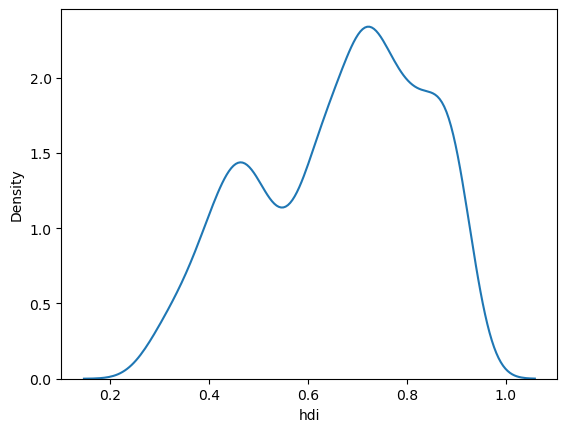

In [17]:
# plot untuk melihat distribusi HDI jika tidak dibedakan berdasarkan continent
sns.kdeplot(data = dataset, x = "hdi")
#plt.axvline(dataset.pm10.mean(), 0, 1, color = "g")

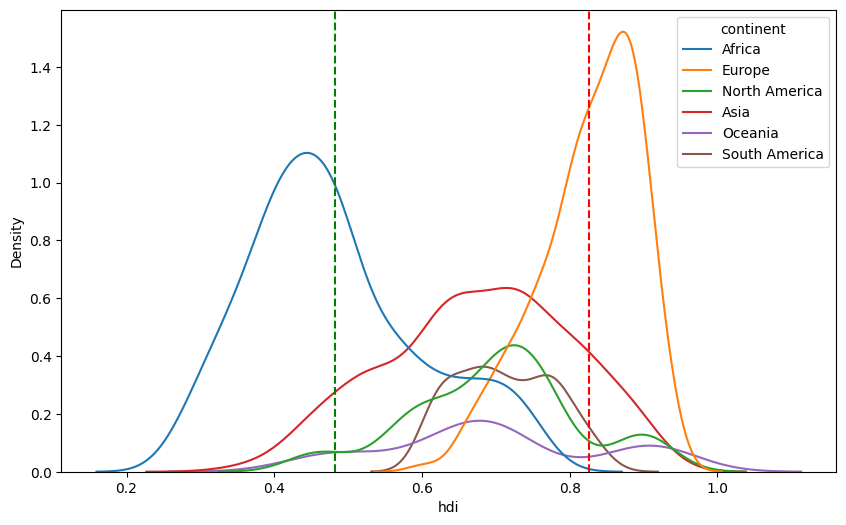

In [29]:
# plot untuk melihat distribusi HDI jika dibedakan berdasarkan continent
plt.figure(figsize=(10,6))
sns.kdeplot(data = dataset, x = "hdi", hue = "continent", legend = "best")

plt.axvline(dataset_africa.hdi.mean(), color = "g", linestyle="--")
plt.axvline(dataset_europe.hdi.mean(), 0, 1, color = "r", linestyle="--" )

In [ ]:
# distribusi skew ke kiri (nilai skew fisher-pearson negatif) untuk continent Africa, dan skew kanan untuk continent Europe
# mean 2 kelas berbeda jauh, imputasi berdasarkan kelas
# kesimpulan: untuk HDI akan menggunakan median untuk imputasi kelas Africa dan Europe, mean untuk kelas continent lainnya

#### 3.2.9. Pearson Corrlation

<Axes: >

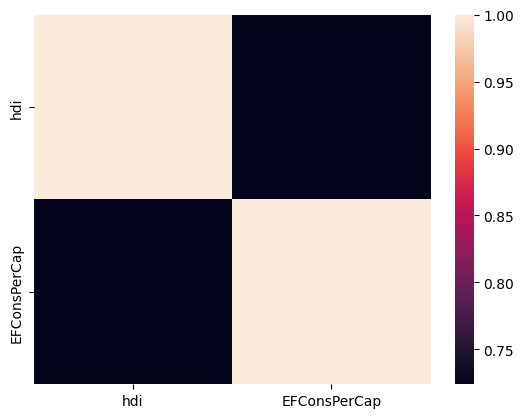

In [30]:
sns.heatmap(dataset.corr(numeric_only = True))

#### 3.2.10. T Test untuk PM10

In [ ]:
# h0    = mean HDI untuk Africa = mean HDI untuk Europe
# h1    = mean HDI untuk Africa != mean HDI untuk Europe

In [31]:
# perform t-test untuk 2 variabel
scs.ttest_ind(
    dataset_europe[dataset_europe.hdi.isnull() != True].hdi,
    dataset_africa[dataset_africa.hdi.isnull() != True].hdi
)

Ttest_indResult(statistic=53.54330424217592, pvalue=6.660948515647218e-287)

In [32]:
# nilai t critical untuk alpha 0.05
scs.t.ppf(0.05, df = (len(dataset) - 2))

-1.6457384753208981

In [87]:
# dengan nilai t-value < t-critical dan nilai p-value < 0.05 maka h0 di reject
# mean antara Africa dan Erope untuk HDI statistically significant

### 3.3. Cek Imbalance Label

In [41]:
dataset.continent.value_counts()

Africa           504
Europe           432
Asia             381
North America    181
South America    132
Oceania           95
Name: continent, dtype: int64

<Axes: xlabel='hdi', ylabel='Count'>

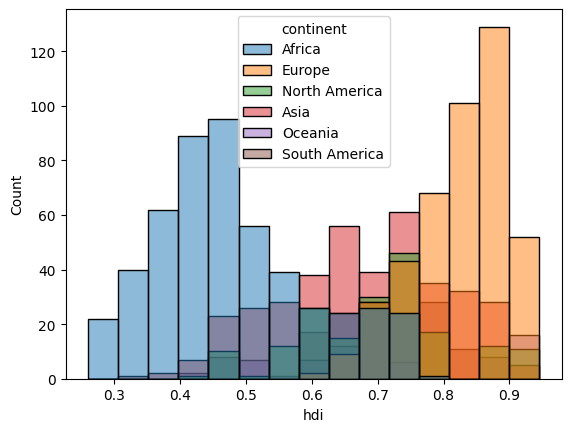

In [39]:
sns.histplot(data = dataset, x = "hdi", hue = "continent")

In [ ]:
#The imbalance 

### 3.4. Cek Outliers

<Axes: xlabel='hdi'>

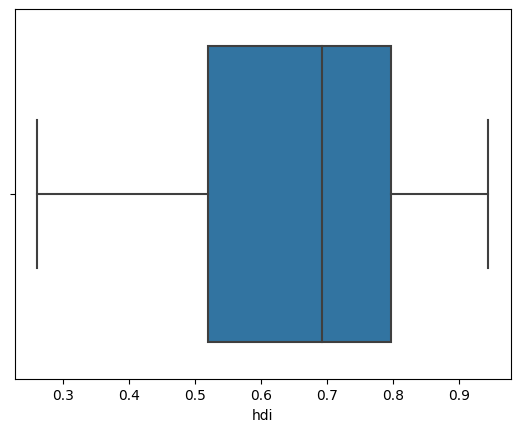

In [40]:
sns.boxplot(data = dataset, x = "hdi")

<AxesSubplot: xlabel='pm25'>

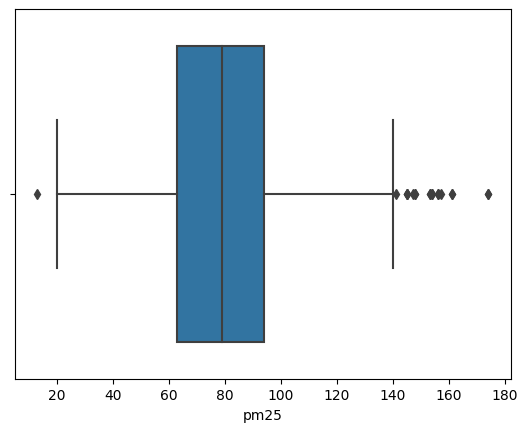

In [122]:
sns.boxplot(data = dataset, x = "pm25")

<AxesSubplot: xlabel='so2'>

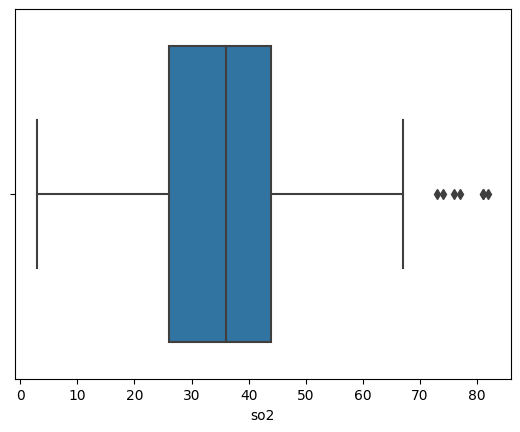

In [129]:
sns.boxplot(data = dataset, x = "so2")

<AxesSubplot: xlabel='co'>

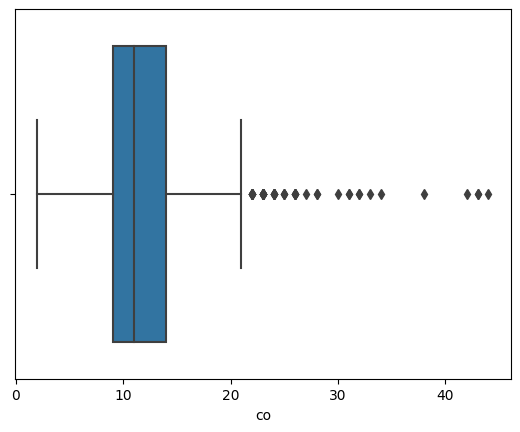

In [134]:
sns.boxplot(data = dataset, x = "co")

<AxesSubplot: xlabel='o3'>

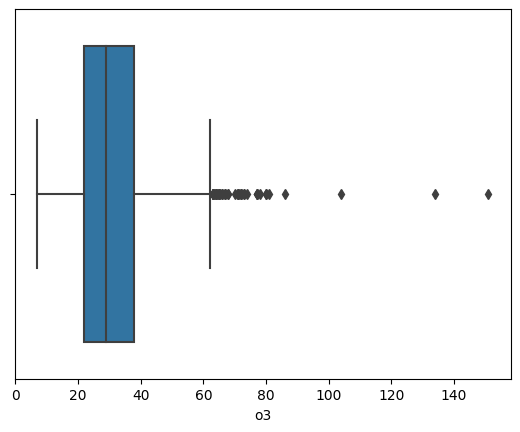

In [130]:
sns.boxplot(data = dataset, x = "o3")

<AxesSubplot: xlabel='no2'>

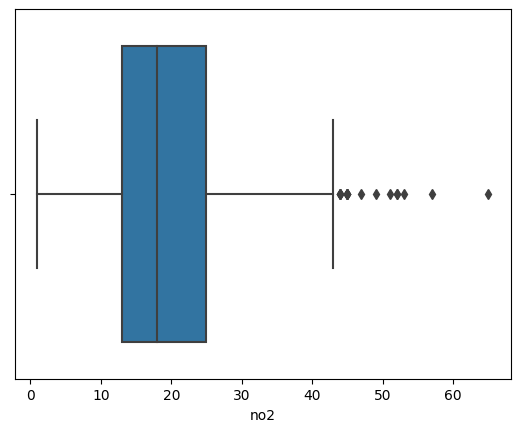

In [133]:
sns.boxplot(data = dataset, x = "no2")

## 4. Kesimpulan

1. Missing value handling
1.1. pm10      : mean kelas
1.2. pm25      : mean kelas
1.3. so2       : mean
1.4. co        : median
1.5. o3        : median
1.6. no2       : median

2. Join kategori sedang dan tidak sehat menjadi tidak baik

3. Balancing label baik dan tidak baik

4. Outlier removal